In [1]:
import ee
ee.Initialize()

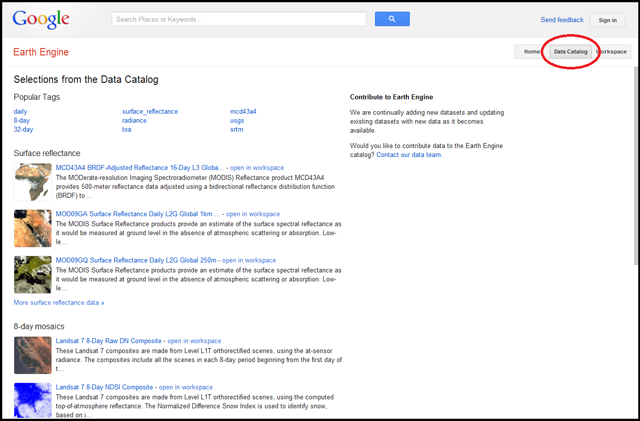

In [3]:
from IPython.display import Image
Image('http://www.google.com/earth/outreach/images/tutorials_eeintro_05_data_catalog.png')

In [4]:
image_object = ee.Image()

In [7]:
[method for method in dir(image_object) if not method.startswith('_')]

['And',
 'Not',
 'Or',
 'abs',
 'acos',
 'add',
 'addBands',
 'args',
 'arrayAccum',
 'arrayCat',
 'arrayDimensions',
 'arrayDotProduct',
 'arrayFlatten',
 'arrayGet',
 'arrayLength',
 'arrayLengths',
 'arrayMask',
 'arrayProject',
 'arrayReduce',
 'arrayRepeat',
 'arraySlice',
 'arraySort',
 'arrayTranspose',
 'aside',
 'asin',
 'atan',
 'atan2',
 'bandNames',
 'bandTypes',
 'bilinearSample',
 'bitCount',
 'bitsToArrayImage',
 'bitwiseAnd',
 'bitwiseNot',
 'bitwiseOr',
 'bitwiseXor',
 'bitwise_and',
 'bitwise_not',
 'bitwise_or',
 'bitwise_xor',
 'byte',
 'cast',
 'cat',
 'cbrt',
 'ceil',
 'changeProj',
 'clamp',
 'classify',
 'clip',
 'clipToCollection',
 'cluster',
 'combine_',
 'connectedComponents',
 'connectedPixelCount',
 'constant',
 'convolve',
 'copyProperties',
 'cos',
 'cosh',
 'cumulativeCost',
 'date',
 'derivative',
 'digamma',
 'displace',
 'displacement',
 'distance',
 'divide',
 'double',
 'encode',
 'entropy',
 'eq',
 'erf',
 'erfInv',
 'erfc',
 'erfcInv',
 'exp',
 '

In [8]:
image_casa = ee.Image('LC8_L1T/LC81910312016217LGN00');

In [11]:
[method for method in dir(image_casa) if not method.startswith('_')]

['And',
 'Not',
 'Or',
 'abs',
 'acos',
 'add',
 'addBands',
 'args',
 'arrayAccum',
 'arrayCat',
 'arrayDimensions',
 'arrayDotProduct',
 'arrayFlatten',
 'arrayGet',
 'arrayLength',
 'arrayLengths',
 'arrayMask',
 'arrayProject',
 'arrayReduce',
 'arrayRepeat',
 'arraySlice',
 'arraySort',
 'arrayTranspose',
 'aside',
 'asin',
 'atan',
 'atan2',
 'bandNames',
 'bandTypes',
 'bilinearSample',
 'bitCount',
 'bitsToArrayImage',
 'bitwiseAnd',
 'bitwiseNot',
 'bitwiseOr',
 'bitwiseXor',
 'bitwise_and',
 'bitwise_not',
 'bitwise_or',
 'bitwise_xor',
 'byte',
 'cast',
 'cat',
 'cbrt',
 'ceil',
 'changeProj',
 'clamp',
 'classify',
 'clip',
 'clipToCollection',
 'cluster',
 'combine_',
 'connectedComponents',
 'connectedPixelCount',
 'constant',
 'convolve',
 'copyProperties',
 'cos',
 'cosh',
 'cumulativeCost',
 'date',
 'derivative',
 'digamma',
 'displace',
 'displacement',
 'distance',
 'divide',
 'double',
 'encode',
 'entropy',
 'eq',
 'erf',
 'erfInv',
 'erfc',
 'erfcInv',
 'exp',
 '

In [12]:
ndvi = image_casa.normalizedDifference(['B5', 'B4'])

In [18]:
palette = ','.join(['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301'])
url = ndvi.getThumbUrl({
    'palette': palette,
    'min':0,
    'max':1
})
Image(url=url)

In [19]:
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
import datetime
from matplotlib import dates
import matplotlib.dates as mdates
from pylab import *

In [21]:
xBand = 'time'
yBandList = [
        'B1',
        u'B2',
        u'B3',
        u'B4',
        u'B5',
        u'B6_VCID_1',
        u'B6_VCID_2',
        u'B7',
        u'B8',
    ]
startTime = datetime.datetime(2000, 1, 1)
endTime = datetime.datetime(2004, 1, 1)

In [22]:
collection = ee.ImageCollection('LE7_L1T').filterDate(startTime, endTime)
point = {'type':'Point', 'coordinates':[ -116.88629,36.56122]};  # death valley (should be stable)
info = collection.getRegion(point,500).getInfo()

In [38]:
# extract the header column names
header = info[0]
# create a Numpy array of the data
data = array(info[1:])

In [42]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
#time = [i/1000 for i in (data[0:,iTime])]
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(long))]

In [44]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)

In [45]:
band3 = yData[:,2]
band4 = yData[:,3]
ndvi = (band4 - band3) / (band4 + band3)

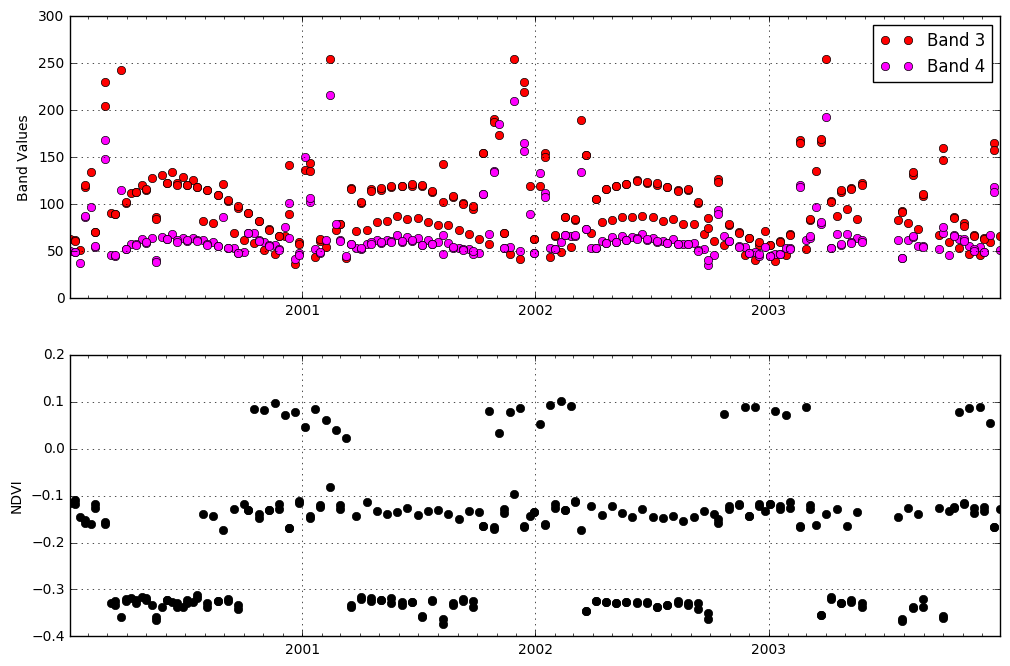

In [46]:
# matplotlib date format object

fig = figure(figsize=(12,8), dpi=80)

# plot the band values
ax1 = fig.add_subplot(211)
ax1.plot(time, yData[:,2], 'o', color="red", label="Band 3")
ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)

#plt.title('Band values as a function of time')
ax1.set_ylabel('Band Values')

# plot NDVI
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(time, ndvi, 'o', color="black", label="NDVI")
ax2.grid(True)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

# Format the ticks.
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax2.set_ylabel('NDVI')

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)

In [47]:
# Convert the timestamp to a numpy array
t = np.array([i.toordinal() for i in time])

array([730122, 730138, 730154, 730186, 730202, 730218, 730234, 730250,
       730266, 730282, 730298, 730314, 730330, 730346, 730362, 730378,
       730394, 730410, 730426, 730442, 730458, 730474, 730490, 730506,
       730522, 730538, 730554, 730570, 730586, 730602, 730618, 730634,
       730650, 730666, 730682, 730698, 730714, 730730, 730746, 730762,
       730778, 730794, 730810, 730826, 730842, 730858, 730874, 730890,
       730906, 730922, 730938, 730954, 730970, 730986, 731002, 731018,
       731034, 731050, 731066, 731082, 731098, 731114, 731130, 731146,
       731178, 731194, 731210, 731226, 731242, 731274, 731290, 731306,
       731322, 731338, 731354, 731418, 731434, 731450, 731482, 731498,
       731514, 731530, 731546, 731562, 731578, 730129, 730145, 730161,
       730177, 730193, 730209, 730225, 730241, 730257, 730273, 730289,
       730305, 730321, 730337, 730353, 730369, 730385, 730401, 730417,
       730433, 730449, 730465, 730481, 730497, 730513, 730545, 730561,
      

In [48]:
A = array([ t, ones(len(t))]).transpose()
b = ndvi
x = linalg.lstsq(A,b)[0] # obtaining the parameters

array([  4.36365615e-05,  -3.20841879e+01])

In [49]:
b_hat = A.dot(x)

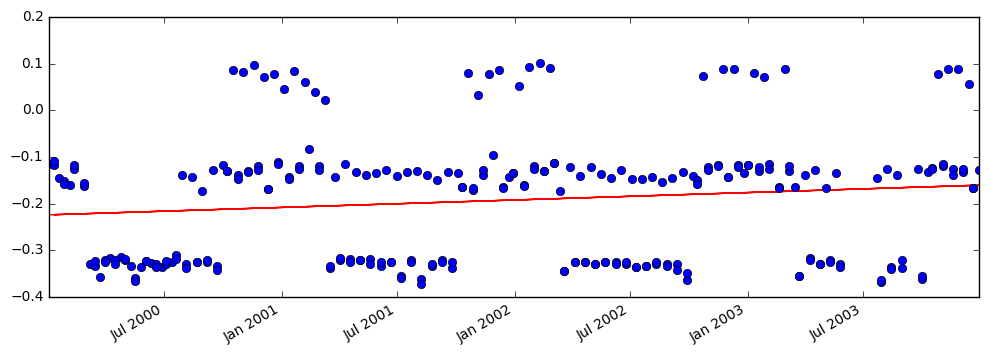

In [50]:
fig2 = figure(figsize=(12,4), dpi=80)
plot(time,b_hat.transpose(),'r-',t,b,'o')
fig2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig2.autofmt_xdate()